In [4]:
import os
import glob
import pandas as pd
from PIL import Image

RAW_DIR = os.path.join('.', 'data', 'raw')
TRAIN_CSV = os.path.join('.', 'data', 'train.csv')

In [5]:
records = []
for img_path in glob.glob(os.path.join(RAW_DIR, '*.jpg')):
    try:
        with Image.open(img_path) as img:
            width, height = img.size
        file_size = os.path.getsize(img_path)
        records.append({
            'filename': os.path.basename(img_path),
            'width': width,
            'height': height,
            'file_size_bytes': file_size
        })
    except Exception as e:
        print(f"Error reading {img_path}: {e}")

# Convert to DataFrame
images_df = pd.DataFrame(records)
images_df.head()


,filename,width,height,file_size_bytes
0,0.jpg,68,69,1762
1,1.jpg,309,387,8276
2,100.jpg,98,168,2721
3,10000.jpg,115,137,2765
4,10001.jpg,105,162,2798


In [ ]:
train_df = pd.read_csv(TRAIN_CSV)
train_df.head()

# Check for any mismatches 
missing = set(train_df['ID']) - set(images_df['filename'])
if missing:
    print(f"Warning: These IDs are in train.csv but no corresponding image found:\n{missing}")
else:
    print("All train.csv IDs have matching images in raw/")


All train.csv IDs have matching images in raw/


In [7]:
data_df = (
    train_df
    .rename(columns={'ID':'filename'})
    .merge(images_df, on='filename', how='left')
)
data_df.head()


,filename,Class,width,height,file_size_bytes
0,377.jpg,MIDDLE,70,85,1727
1,17814.jpg,YOUNG,82,102,2031
2,21283.jpg,MIDDLE,82,133,2583
3,16496.jpg,YOUNG,54,57,1336
4,4487.jpg,MIDDLE,133,200,3657


In [8]:
# 1) Class distribution
class_counts = data_df['Class'].value_counts()
print("Class counts:")
print(class_counts)

# 2) Overall image size statistics
print("\nImage dimension statistics:")
print(data_df[['width','height','file_size_bytes']].describe())

# 3) Per-class size summaries
print("\nPer-class average dimensions:")
print(
    data_df
    .groupby('Class')[['width','height','file_size_bytes']]
    .agg(['mean','median','min','max'])
)


Class counts:
Class
MIDDLE    10804
YOUNG      6706
OLD        2396
Name: count, dtype: int64

Image dimension statistics:
              width        height  file_size_bytes
count  19906.000000  19906.000000     19906.000000
mean      99.010700    125.467246      2523.939164
std       78.192463     92.986340      2321.520698
min        8.000000     11.000000       644.000000
25%       43.000000     59.000000      1111.000000
50%       75.000000     97.000000      1681.000000
75%      129.000000    163.000000      2964.750000
max      724.000000    713.000000     27858.000000

Per-class average dimensions:
             width                      height                  \
              mean median min  max        mean median min  max   
Class                                                            
MIDDLE   93.402536   69.0   8  722  118.020085   91.0  11  648   
OLD      93.021285   69.0  10  512  116.778381   89.0  13  554   
YOUNG   110.185953   86.0   9  724  140.569788  110.0  12

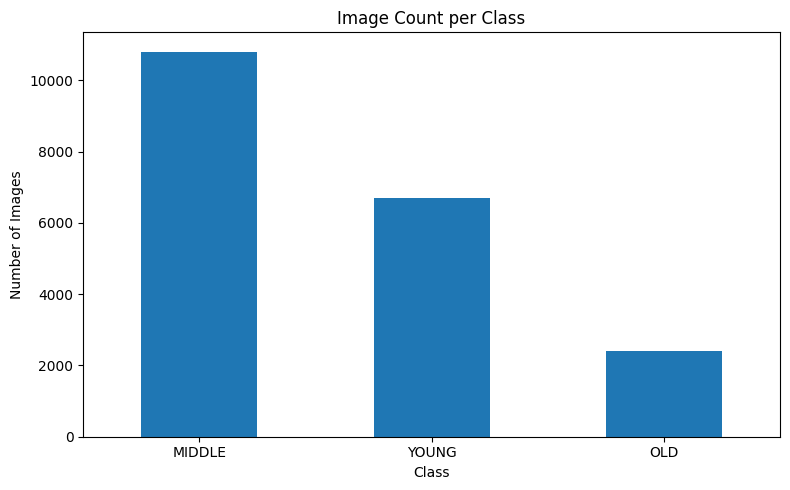

In [11]:
import matplotlib.pyplot as plt

# Compute counts and percentages
class_counts = data_df['Class'].value_counts()
class_percents = class_counts / class_counts.sum() * 100

# Bar chart of counts
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar')
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
 

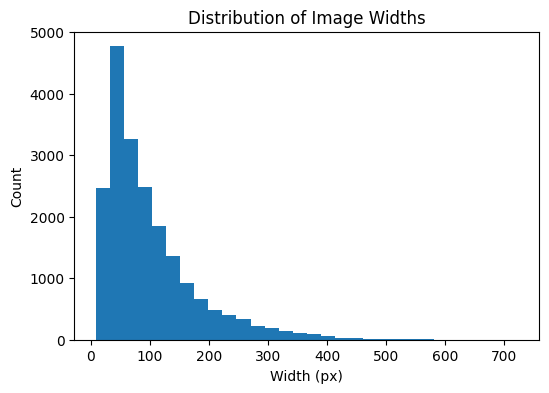

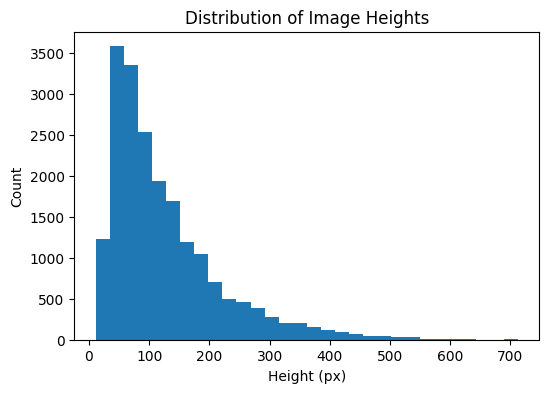

In [9]:
import matplotlib.pyplot as plt

# Histogram of widths
plt.figure(figsize=(6,4))
plt.hist(data_df['width'], bins=30)
plt.title("Distribution of Image Widths")
plt.xlabel("Width (px)")
plt.ylabel("Count")
plt.show()

# Histogram of heights
plt.figure(figsize=(6,4))
plt.hist(data_df['height'], bins=30)
plt.title("Distribution of Image Heights")
plt.xlabel("Height (px)")
plt.ylabel("Count")
plt.show()
